# MODELE PŁYTKIE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [4]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
negative_rows = df[(df < 0).any(axis=1)]
print(negative_rows)

Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []


Nie mamy danych ujemnych.

In [6]:
df["age"]= np.log(df.age)
df["trtbps"]= np.log(df.trtbps)
df["chol"]= np.log(df.chol)
df["thalachh"]= np.log(df.thalachh)

Przeprowadzam ręcznie transformacje logarytmiczną na danych numerycznych.

In [7]:
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continous_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

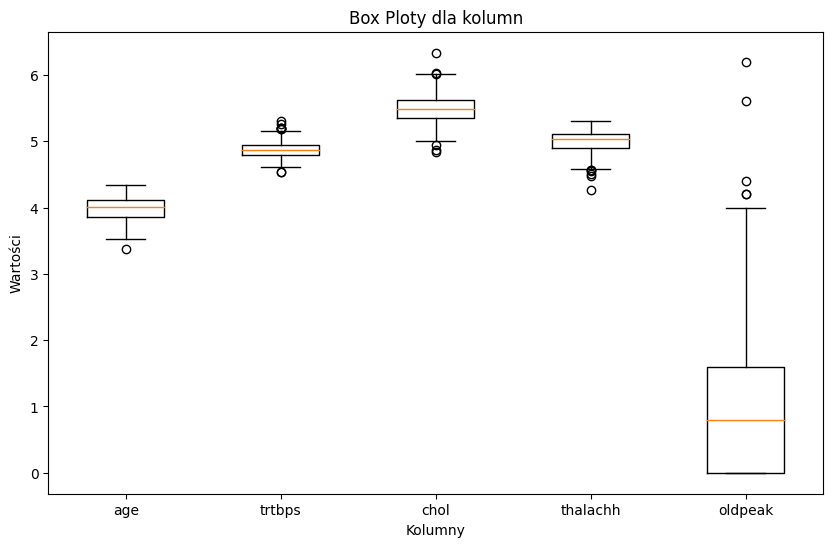

In [8]:
# Tworzenie box plotów
selected_columns = continous_cols
selected_df = df[selected_columns]
plt.figure(figsize=(10, 6))
plt.boxplot(selected_df, labels=selected_df.columns)
plt.title('Box Ploty dla kolumn')
plt.xlabel('Kolumny')
plt.ylabel('Wartości')

# Wyświetlanie box plotów
plt.show()

In [21]:
#Schuffling
import random

#Scaling
from sklearn.preprocessing import MinMaxScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn import model_selection
from sklearn import  metrics

In [11]:
#Data Splitting
X=df.iloc[:,:13]
y=df["output"]

#Train, test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=65)

#MinMax transformacja
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

#KFOLD
kfold = model_selection.KFold(n_splits=5)

Dzielimy na train i test oraz normalizujemy za pomocą MinMaxScalera.

In [15]:
# SVM z GridSearch

searcher_SVC = GridSearchCV(SVC(), {'C': [1, 3, 5, 7], 'kernel': ['linear', 'poly', 'rbf']}, cv=kfold).fit(X_train, y_train.values.ravel())

print("Params :", searcher_SVC.best_params_)
print("Score  :", searcher_SVC.best_score_)

y_pred_1 = searcher_SVC.predict(X_test)
print("The SVM test accuracy score after tuning", accuracy_score(y_test, y_pred_1))

Params : {'C': 7, 'kernel': 'rbf'}
Score  : 0.8220238095238095
The SVM test accuracy score after tuning 0.9180327868852459


In [18]:
# LOGISTIC REGRESSION z GridSearch

searcher_LG = GridSearchCV(LogisticRegression(), {'C': [0.1, 1.0, 10.0, 30.0, 100.0],
              'penalty': ['l1', 'l2']}, cv=kfold).fit(X_train, y_train.values.ravel())

print("Params :", searcher_LG.best_params_)
print("Score  :", searcher_LG.best_score_)

y_pred_2 = searcher_LG.predict(X_test)
print("The Logistic regression test accuracy score after tuning", accuracy_score(y_test, y_pred_2))

Params : {'C': 10.0, 'penalty': 'l2'}
Score  : 0.8140306122448979
The Logistic regression test accuracy score after tuning 0.9180327868852459


In [20]:
#RANDOM FOREST z GridSearch

searcher_RF = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}, cv=kfold)

searcher_RF.fit(X_train, y_train)

print("Params :", searcher_RF.best_params_)
print("Score  :", searcher_RF.best_score_)

y_pred_3 = searcher_RF.predict(X_test)
print("The Random forest test accuracy score after tuning", accuracy_score(y_test, y_pred_3))

Params : {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Score  : 0.8140306122448979
The Random forest test accuracy score after tuning 0.9016393442622951


In [23]:
#GRADIENT BOOSTING z Randomized Search
searcher_GB = RandomizedSearchCV(GradientBoostingClassifier(), {
    'n_estimators': sp_randint(100, 500),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': sp_randint(3, 10),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10)
}, n_iter=100, cv=kfold)

searcher_GB.fit(X_train, y_train)

print("Params :", searcher_GB.best_params_)
print("Score  :", searcher_GB.best_score_)

y_pred_4 = searcher_GB.predict(X_test)
print("The Gradient boosting test accuracy score ", accuracy_score(y_test, y_pred_4))

Params : {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 408}
Score  : 0.8180272108843537
The Gradient boosting test accuracy score  0.8688524590163934


In [26]:
#XGBoost z Randomized Search

searcher_XGB = RandomizedSearchCV(XGBClassifier(), {
    'n_estimators': sp_randint(1, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': sp_randint(1, 10),
}, n_iter=30, cv=5).fit(X_train, y_train)

print("Params :", searcher_XGB.best_params_)
print("Score  :", searcher_XGB.best_score_)

y_pred_5 = searcher_XGB.predict(X_test)
print("The XGB test accuracy score ", accuracy_score(y_test, y_pred_5))

XGB Classifier test accuracy score 0.9180327868852459
Params : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 42}
Score  : 0.7976190476190476
The XGB test accuracy score  0.8852459016393442
